In [1]:
import numpy as np
import pandas as pd
import os
from ast import literal_eval
import matplotlib.pyplot as plt
import skimage as sk

In [2]:
%matplotlib inline

In [3]:
PATH = '../../data/full/bg/'

In [5]:
for file in os.listdir('.'):
    if '.csv' in file:
        csv_path = file
df = pd.read_csv(csv_path)

In [6]:
df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,0ab9cdefc666573f8019356ffefe0c69.jpg,42385,{},7,0,"{""name"":""point"",""cx"":156,""cy"":129}",{}
1,0ab9cdefc666573f8019356ffefe0c69.jpg,42385,{},7,1,"{""name"":""point"",""cx"":237,""cy"":266}",{}
2,0ab9cdefc666573f8019356ffefe0c69.jpg,42385,{},7,2,"{""name"":""point"",""cx"":262,""cy"":341}",{}
3,0ab9cdefc666573f8019356ffefe0c69.jpg,42385,{},7,3,"{""name"":""point"",""cx"":300,""cy"":272}",{}
4,0ab9cdefc666573f8019356ffefe0c69.jpg,42385,{},7,4,"{""name"":""point"",""cx"":394,""cy"":132}",{}


In [7]:
index = df.index
filenames = df.loc[:,'filename']
region_id = df.loc[:,'region_id']
dictionary = [literal_eval(df.loc[:,'region_shape_attributes'][i]) for i in range(len(index))]

In [8]:
print(dictionary[6]['cx'])

252


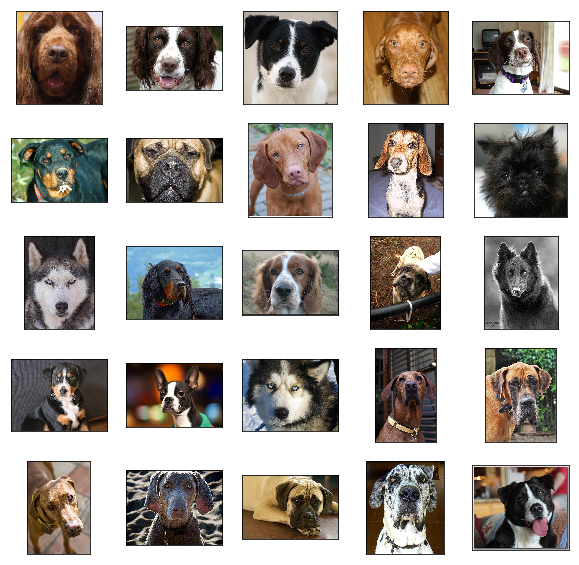

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = sk.io.imread(PATH + filenames[i*7])
    plt.imshow(image, cmap=plt.cm.binary)

In [14]:
def solve(n, output_shape=(224,224)):
    """
    Arguments:
     -n: image index (times 7 as there are 7 labels per images in the dataset)
     -output_shape 
    Return:
    [[s*cos(theta) -s*sin(theta) tx]
     [s*sin(theta) s*cos(theta)  ty]
     [0            0             1 ]]
    """
    w, h = output_shape
    
    x_6 = dictionary[5+n]['cx']
    y_6 = dictionary[5+n]['cy']
    x_7 = dictionary[6+n]['cx']
    y_7 = dictionary[6+n]['cy']

    x_2 = dictionary[1+n]['cx']
    y_2 = dictionary[1+n]['cy']
    x_4 = dictionary[3+n]['cx']
    y_4 = dictionary[3+n]['cy']

    x_1 = dictionary[0+n]['cx']
    y_1 = dictionary[0+n]['cy']
    x_5 = dictionary[4+n]['cx']
    y_5 = dictionary[4+n]['cy']
    print(x_6,y_6)
    A = np.array([[x_6, -y_6, 1, 0], [y_6, x_6, 0, 1], [x_7, -y_7, 1, 0], [y_7, x_7, 0, 1]])
    b = np.array([w//2, 0, w//2, h])

    w_c = 1
    x_c = w_c * (x_2 + x_4)/2.0
    y_c = w_c * (y_2 + y_4)/2.0

    w_d = 1
    x_d = w_d * (x_1 + x_5)/2.0
    y_d = w_d * (y_1 + y_5)/2.0

    # Add constraints: the eyes middle point and nose middle points should be in the middle of the picture
    A_c = np.append(A, np.array([[x_c, -y_c, w_c, 0], [x_d, -y_d, w_d, 0]]), axis=0)
    b_c = np.append(b, [w_c * w//2, w_d * w//2])

    # Add constraints: the eyes y axis should be equal (eyes are horizontal)
    # y_1 = y_5 => y_1 - y_5 = 0
    A_c = np.append(A_c, np.array([[y_1 - y_5, x_1 - x_5,0,0]]), axis=0)
    b_c = np.append(b_c, [0])

    sol = np.linalg.inv(A_c.T.dot(A_c)).dot(A_c.T.dot(b_c))
    
    return np.array([[sol[0], -sol[1], sol[2]],[sol[1], sol[0], sol[3]], [0,0,1]])

277 1
246 1
274 49
233 66
222 47
211 14
239 1
171 36
197 35
236 114
184 94
212 70
238 16
252 164
173 111
280 18
253 91
219 1
187 126
186 75
119 118
274 4
343 35
222 24
273 84


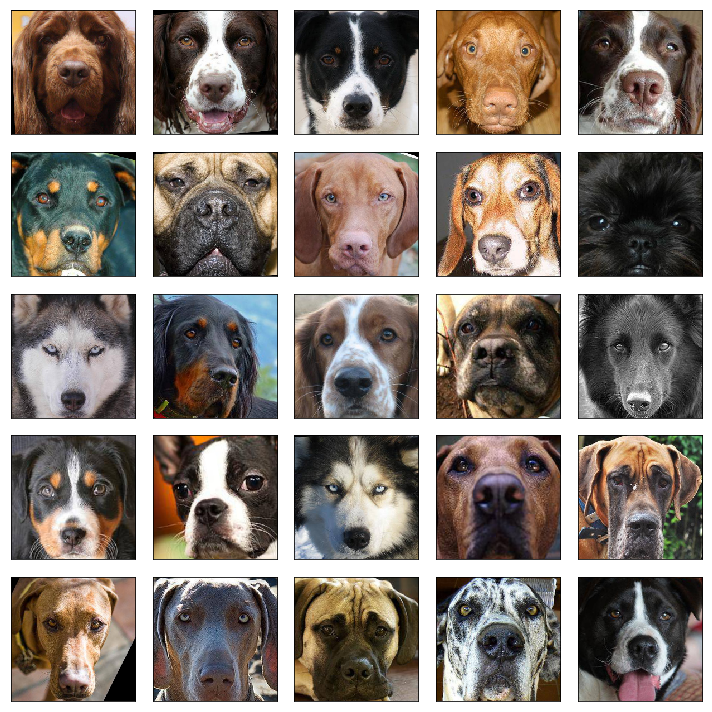

In [15]:
plt.figure(figsize=(10,10))
offset = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = sk.io.imread(PATH + filenames[i*7])
    M = solve((i*7))
    test = sk.transform.warp(image, np.linalg.inv(M))
    test = test[:224,:224]
    sk.io.imshow(test)
    plt.imshow(test, cmap=plt.cm.binary)

[[ 191.  -188.     1.     0. ]
 [ 188.   191.     0.     1. ]
 [ 130.  -384.     1.     0. ]
 [ 384.   130.     0.     1. ]
 [ 169.  -265.     1.     0. ]
 [ 174.5 -237.     1.     0. ]
 [ -34.  -129.     0.     0. ]]
[112   0 112 224 112 112   0]
[   1.04729087   -0.30306358 -143.35376814 -138.88348503]
Solution:
(1.090259468681709, -0.2816841455958963)


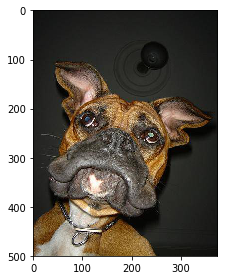

In [136]:
n = 7 * 35

x_6 = dictionary[5+n]['cx']
y_6 = dictionary[5+n]['cy']
x_7 = dictionary[6+n]['cx']
y_7 = dictionary[6+n]['cy']

x_2 = dictionary[1+n]['cx']
y_2 = dictionary[1+n]['cy']
x_4 = dictionary[3+n]['cx']
y_4 = dictionary[3+n]['cy']

x_1 = dictionary[0+n]['cx']
y_1 = dictionary[0+n]['cy']
x_5 = dictionary[4+n]['cx']
y_5 = dictionary[4+n]['cy']

A = np.array([[x_6, -y_6, 1, 0], [y_6, x_6, 0, 1], [x_7, -y_7, 1, 0], [y_7, x_7, 0, 1]])
b = np.array([112, 0, 112, 224])

w_c = 1
x_c = w_c * (x_2 + x_4)/2.0
y_c = w_c * (y_2 + y_4)/2.0

w_d = 1
x_d = w_d * (x_1 + x_5)/2.0
y_d = w_d * (y_1 + y_5)/2.0

# Add constraints: the eyes middle point and nose middle points should be in the middle of the picture
A_c = np.append(A, np.array([[x_c, -y_c, w_c, 0], [x_d, -y_d, w_d, 0]]), axis=0)
b_c = np.append(b, [w_c * 112, w_d * 112])

# Add constraints: the eyes y axis should be equal (eyes are horizontal)
# y_1 = y_5 => y_1 - y_5 = 0
A_c = np.append(A_c, np.array([[y_1 - y_5, x_1 - x_5,0,0]]), axis=0)
b_c = np.append(b_c, [0])

print(A_c)
print(b_c)

sol = np.linalg.inv(A_c.T.dot(A_c)).dot(A_c.T.dot(b_c))

print(sol)

s = np.sqrt(sol[0]**2 + sol[1]**2)
theta = np.arctan2(sol[1], sol[0])

print("Solution:")
print((s, theta))

filename = PATH + filenames[n]
image = sk.io.imread(filename)
sk.io.imshow(image)

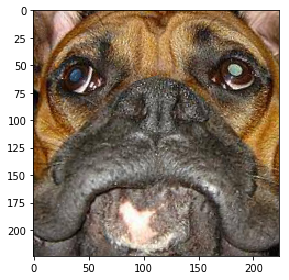

In [137]:
M = np.array([[sol[0], -sol[1], sol[2]],[sol[1], sol[0], sol[3]], [0,0,1]])
test = sk.transform.warp(image, np.linalg.inv(M))
test = test[:224,:224]
sk.io.imshow(test)